### Part A

Importing all the necessary Libraries

In [10]:
#importing the libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_validate, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Read CSV file into DataFrame train_data
train_data = pd.read_csv('CE802_P2_Data.csv')
#check for null values
#train_data.isnull().sum()
FX1=train_data.drop(columns=['Class','F21'])
FY1=train_data['Class']

# Support Vector Machine

Performing Support Vector Classification without performing any feature-engineering,  hyper-parameter tuning, cross-validation or pipelining, etc

In [11]:
#specifying targets and labels
X1=train_data.drop(columns=['Class','F21'])
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
scalar=StandardScaler()
X=scalar.fit_transform(X)
X_test=scalar.transform(X_test)
clf=SVC()
clf.fit(X,Y)
y_pred = clf.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))


Confusion Matrix : 
[[68 31]
 [28 73]]
Accuracy Score : 0.705
F1 Score : 0.7121951219512195
Precision Score : 0.7019230769230769
Recall Score : 0.7227722772277227


Performing Support Vector Classification Algorithm while dropping the Feature21

In [12]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
scalar=StandardScaler()
X=scalar.fit_transform(X)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
dropper = ColumnTransformer([('dropper', 'drop', 20)], remainder='passthrough')
svc=SVC()
pipe = Pipeline([('dropper', dropper) , ('svc', svc)])
#performing grid-search to tune-hyper-parameters
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [ 0.0001, 0.001, 0.01, 0.1, 1], 'svc__kernel': ['rbf' , 'linear']}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
X_test=scalar.transform(X_test)
pipes = Pipeline([('dropper', dropper)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))


{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Average accuracy 0.7112499999999999
Confusion Matrix : 
[[66 33]
 [19 82]]
Accuracy Score : 0.74
F1 Score : 0.7592592592592593
Precision Score : 0.7130434782608696
Recall Score : 0.8118811881188119


Performing Support Vector Classification Algorithm while taking mean by SimpleImputer for Feature21

In [13]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
mean= SimpleImputer(strategy='mean', fill_value='Missing')
scalar=StandardScaler()
svc=SVC()
pipe = Pipeline([('mean', mean), ('scalar',scalar) , ('svc', svc)])
#performing grid-search to tune-hyper-parameters
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [ 0.0001, 0.001, 0.01, 0.1, 1], 'svc__kernel': ['rbf' , 'linear']}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('mean', mean)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'svc__C': 1000, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Average accuracy 0.74125
Confusion Matrix : 
[[73 26]
 [24 77]]
Accuracy Score : 0.75
F1 Score : 0.7549019607843138
Precision Score : 0.7475728155339806
Recall Score : 0.7623762376237624


Performing Support Vector Classification Algorithm while taking mean by IterativeImputer for Feature21

In [14]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
mean= IterativeImputer(random_state=0)
scalar=StandardScaler()
svc=SVC()
#defining my pipeline
pipe = Pipeline([('mean', mean), ('scalar',scalar) , ('svc', svc)])
#performing grid-search to tune-hyper-parameters
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [ 0.0001, 0.001, 0.01, 0.1, 1], 'svc__kernel': ['rbf' , 'linear']}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('mean', mean)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'svc__C': 1000, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Average accuracy 0.7225
Confusion Matrix : 
[[73 26]
 [23 78]]
Accuracy Score : 0.755
F1 Score : 0.7609756097560977
Precision Score : 0.75
Recall Score : 0.7722772277227723


# K Nearest Neighbour

Performing K Nearest Neighbour without performing any feature-engineering,  hyper-parameter tuning, cross-validation or pipelining, etc

In [15]:
#specifying targets and labels
X1=train_data.drop(columns=['Class','F21'])
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
scalar=StandardScaler()
X=scalar.fit_transform(X)
X_test=scalar.transform(X_test)
clf=KNeighborsClassifier()
clf.fit(X,Y)
y_pred = clf.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

Confusion Matrix : 
[[62 37]
 [43 58]]
Accuracy Score : 0.6
F1 Score : 0.5918367346938775
Precision Score : 0.6105263157894737
Recall Score : 0.5742574257425742


Performing K Nearest Neighbour Algorithm while dropping the Feature21

In [16]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
scalar=StandardScaler()
X=scalar.fit_transform(X)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
dropper = ColumnTransformer([('dropper', 'drop', 20)], remainder='passthrough')
knn = KNeighborsClassifier()
pipe = Pipeline([('dropper', dropper) , ('knn', knn)])
#performing grid-search to tune-hyper-parameters
param_grid = {'knn__leaf_size':list(range(1,45)), 'knn__n_neighbors':list(range(1,100)), 'knn__p': [1,2], 'knn__weights': ['uniform' , 'distance']}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
X_test=scalar.transform(X_test)
pipes = Pipeline([('dropper', dropper)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'knn__leaf_size': 1, 'knn__n_neighbors': 36, 'knn__p': 1, 'knn__weights': 'distance'}
Average accuracy 0.6587500000000001
Confusion Matrix : 
[[75 24]
 [45 56]]
Accuracy Score : 0.655
F1 Score : 0.6187845303867403
Precision Score : 0.7
Recall Score : 0.5544554455445545


Performing K Nearest Neighbour Algorithm while taking mean by SimpleImputer for Feature21

In [17]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
mean= SimpleImputer(strategy='mean', fill_value='Missing')
scalar=StandardScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('mean', mean), ('scalar',scalar) , ('knn', knn)])
#performing grid-search to tune-hyper-parameters
param_grid = {'knn__leaf_size':list(range(1,45)), 'knn__n_neighbors':list(range(1,100)), 'knn__p': [1,2] , 'knn__weights': ['uniform' , 'distance']}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('mean', mean)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'knn__leaf_size': 1, 'knn__n_neighbors': 32, 'knn__p': 1, 'knn__weights': 'distance'}
Average accuracy 0.6950000000000001
Confusion Matrix : 
[[78 21]
 [40 61]]
Accuracy Score : 0.695
F1 Score : 0.6666666666666667
Precision Score : 0.7439024390243902
Recall Score : 0.6039603960396039


Performing K Nearest Neighbour Algorithm while taking mean by IterativeImputer for Feature21

In [18]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
mean= IterativeImputer(random_state=0)
scalar=StandardScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('mean', mean), ('scalar',scalar) , ('knn', knn)])
#performing grid-search to tune-hyper-parameters
param_grid = {'knn__leaf_size':list(range(1,45)), 'knn__n_neighbors':list(range(1,100)), 'knn__p': [1,2]}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('mean', mean)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'knn__leaf_size': 1, 'knn__n_neighbors': 33, 'knn__p': 1}
Average accuracy 0.6950000000000001
Confusion Matrix : 
[[82 17]
 [42 59]]
Accuracy Score : 0.705
F1 Score : 0.6666666666666666
Precision Score : 0.7763157894736842
Recall Score : 0.5841584158415841


# Decision Tree Classifier

Performing Decision Tree Classifier without performing any feature-engineering,  hyper-parameter tuning, cross-validation or pipelining, etc

In [55]:
#specifying targets and labels
X1=train_data.drop(columns=['Class','F21'])
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
scalar=StandardScaler()
X=scalar.fit_transform(X)
X_test=scalar.transform(X_test)
clf=DecisionTreeClassifier()
clf.fit(X,Y)
y_pred = clf.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

Confusion Matrix : 
[[74 25]
 [21 80]]
Accuracy Score : 0.77
F1 Score : 0.7766990291262137
Precision Score : 0.7619047619047619
Recall Score : 0.7920792079207921


Performing Decision Tree Classifier Algorithm while dropping the Feature21

In [20]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
scalar=StandardScaler()
dropper = ColumnTransformer([('dropper', 'drop', 20)], remainder='passthrough')
dtc = DecisionTreeClassifier()
pipe = Pipeline([('dropper', dropper) ,('scalar',scalar), ('dtc', dtc)])
#performing grid-search to tune-hyper-parameters
param_grid = {'dtc__criterion':['gini', 'entropy'],'dtc__max_depth':list(range(1,25)),'dtc__min_samples_split' :np.linspace(0.1, 1.0, 10, endpoint=True), 'dtc__min_samples_leaf' : np.linspace(0.1, 0.5, 10, endpoint=True)} 
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('dropper', dropper)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'dtc__criterion': 'entropy', 'dtc__max_depth': 3, 'dtc__min_samples_leaf': 0.1, 'dtc__min_samples_split': 0.1}
Average accuracy 0.7799999999999999
Confusion Matrix : 
[[66 33]
 [15 86]]
Accuracy Score : 0.76
F1 Score : 0.7818181818181817
Precision Score : 0.7226890756302521
Recall Score : 0.8514851485148515


Performing Decision Tree Classifier Algorithm while taking mean by SimpleImputer for Feature21

In [21]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
mean= SimpleImputer(strategy='mean', fill_value='Missing')
scalar=StandardScaler()
dtc = DecisionTreeClassifier()
pipe = Pipeline([('mean', mean), ('scalar',scalar) , ('dtc', dtc)])
#performing grid-search to tune-hyper-parameters
param_grid = {'dtc__criterion':['gini', 'entropy'],'dtc__max_depth':list(range(1,25)),'dtc__min_samples_split' :np.linspace(0.1, 1.0, 10, endpoint=True), 'dtc__min_samples_leaf' : np.linspace(0.1, 0.5, 10, endpoint=True)} 
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('mean', mean)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'dtc__criterion': 'entropy', 'dtc__max_depth': 3, 'dtc__min_samples_leaf': 0.1, 'dtc__min_samples_split': 0.1}
Average accuracy 0.7762500000000001
Confusion Matrix : 
[[66 33]
 [15 86]]
Accuracy Score : 0.76
F1 Score : 0.7818181818181817
Precision Score : 0.7226890756302521
Recall Score : 0.8514851485148515


Performing Decision Tree Classifier Algorithm while taking mean by IterativeImputer for Feature21

In [22]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
mean= IterativeImputer(random_state=0)
scalar=StandardScaler()
dtc = DecisionTreeClassifier()
pipe = Pipeline([('mean', mean), ('scalar',scalar) , ('dtc', dtc)])
#performing grid-search to tune-hyper-parameters
param_grid = {'dtc__criterion':['gini', 'entropy'],'dtc__max_depth':list(range(1,25)),'dtc__min_samples_split' :np.linspace(0.1, 1.0, 10, endpoint=True), 'dtc__min_samples_leaf' : np.linspace(0.1, 0.5, 10, endpoint=True)} 
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('mean', mean)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'dtc__criterion': 'entropy', 'dtc__max_depth': 3, 'dtc__min_samples_leaf': 0.1, 'dtc__min_samples_split': 0.1}
Average accuracy 0.76125
Confusion Matrix : 
[[69 30]
 [15 86]]
Accuracy Score : 0.775
F1 Score : 0.792626728110599
Precision Score : 0.7413793103448276
Recall Score : 0.8514851485148515


# Random Forest Classifier

Performing Random Forest Classifier without performing any feature-engineering,  hyper-parameter tuning, cross-validation or pipelining, etc

In [68]:
#specifying targets and labels
X1=train_data.drop(columns=['Class','F21'])
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
scalar=StandardScaler()
X=scalar.fit_transform(X)
X_test=scalar.transform(X_test)
clf=RandomForestClassifier()
clf.fit(X,Y)
y_pred = clf.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

Confusion Matrix : 
[[80 19]
 [16 85]]
Accuracy Score : 0.825
F1 Score : 0.8292682926829268
Precision Score : 0.8173076923076923
Recall Score : 0.8415841584158416


Performing Random Forest Classifier Algorithm while dropping Feature21

In [24]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)                                        
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
scalar=StandardScaler()
dropper = ColumnTransformer([('dropper', 'drop', 20)], remainder='passthrough')
clf=RandomForestClassifier(n_estimators=100)
pipe = Pipeline([('dropper', dropper) ,('scalar',scalar), ('clf', clf)])
#performing grid-search to tune-hyper-parameters
param_grid = {'clf__criterion':['gini', 'entropy'],'clf__n_estimators':list(range(5,25)),'clf__min_samples_split' :np.linspace(0.1, 1.0, 10, endpoint=True)} 
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('dropper', dropper)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'clf__criterion': 'entropy', 'clf__min_samples_split': 0.1, 'clf__n_estimators': 15}
Average accuracy 0.7737499999999999
Confusion Matrix : 
[[77 22]
 [20 81]]
Accuracy Score : 0.79
F1 Score : 0.7941176470588236
Precision Score : 0.7864077669902912
Recall Score : 0.801980198019802


Performing Random Forest Classifier Algorithm while taking mean by SimpleImputer for Feature21

In [25]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
scalar=StandardScaler()
X=scalar.fit_transform(X)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
mean= SimpleImputer(strategy='mean', fill_value='Missing')
clf=RandomForestClassifier(n_estimators=100)
pipe = Pipeline([('mean', mean) , ('clf', clf)])
#performing grid-search to tune-hyper-parameters
param_grid = {'clf__criterion':['gini', 'entropy'],'clf__n_estimators':list(range(5,25)),'clf__min_samples_split' :np.linspace(0.1, 1.0, 10, endpoint=True)} 
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
X_test=scalar.transform(X_test)
pipes = Pipeline([('mean', mean)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'clf__criterion': 'entropy', 'clf__min_samples_split': 0.1, 'clf__n_estimators': 24}
Average accuracy 0.8
Confusion Matrix : 
[[79 20]
 [13 88]]
Accuracy Score : 0.835
F1 Score : 0.8421052631578947
Precision Score : 0.8148148148148148
Recall Score : 0.8712871287128713


Performing Random Forest Classifier Algorithm while taking mean by IterativeImputer for Feature21

In [26]:
#specifying targets and labels
X1=train_data.drop(columns='Class')
Y1=train_data['Class']
#splitting the data
X, X_test, Y, Y_test = train_test_split(X1, Y1, train_size=0.80, random_state=1, stratify=Y1)
#defining the number of folds in cross-validation
cv = KFold(n_splits=5,shuffle=True)
#defining my pipeline
scalar=StandardScaler()
mean= IterativeImputer(random_state=0)
clf=RandomForestClassifier(n_estimators=100)
pipe = Pipeline([('mean', mean) ,('scalar',scalar), ('clf', clf)])
#performing grid-search to tune-hyper-parameters
param_grid = {'clf__criterion':['gini', 'entropy'],'clf__n_estimators':list(range(5,25)),'clf__min_samples_split' :np.linspace(0.1, 1.0, 10, endpoint=True)}  
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#fitting the pipeline
search.fit(X,Y)
print(search.best_params_)
#computing the average accuracy score while performing cross-validation on different folds
scores = cross_validate(search, X, Y, scoring=['accuracy'], cv=cv, return_estimator=True)
print('Average accuracy', np.mean(scores['test_accuracy']))
#predicting the values on the test data
pipes = Pipeline([('mean', mean)])
pipes.fit_transform(X_test)
y_pred = search.predict(X_test)
#Analyzing the results
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,y_pred)))
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred)))

{'clf__criterion': 'entropy', 'clf__min_samples_split': 0.1, 'clf__n_estimators': 13}
Average accuracy 0.8012499999999999
Confusion Matrix : 
[[75 24]
 [11 90]]
Accuracy Score : 0.825
F1 Score : 0.8372093023255814
Precision Score : 0.7894736842105263
Recall Score : 0.8910891089108911


# Feature Engineering

Performing Feature Engineering by using the confusionmatrix method to find which features are co-related.
On performing this method, it can been seen that no feature is co-related to the other feature even at 50 percent. 
So, no features can be dropped.
Note: Code is used from Project-pro
https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python#:~:text=%20How%20to%20drop%20out%20highly%20correlated%20features,trigular%20matrix.%20So%20now%20we%20are...%20More%20

In [27]:
correlation = FX1.corr().abs()
upper_triangle = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(bool))
#dropping columns having correlation greater than 90 percent
dropping = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.70)]
print(dropping)

[]


checking the features importance

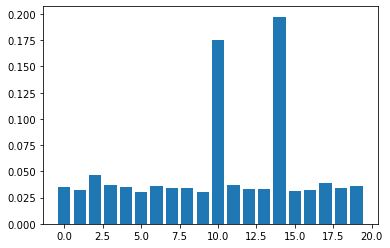

In [28]:
scalar=StandardScaler()
FX1=scalar.fit_transform(FX1)
model=RandomForestClassifier()
model=model.fit(FX1,FY1)
importance = model.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Training on best accuracy algorithm

Training on the the best algorithm(Random Forest Classifier) while dropping the F21 using best hyperparameters got by gridsearchcv

In [77]:
X11=train_data.drop(columns=['Class'])
Y11=train_data['Class']
mean= SimpleImputer(strategy='mean', fill_value='Missing')
X11=mean.fit_transform(X11)
scalar=StandardScaler()
X11=scalar.fit_transform(X11)
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=0.1,n_estimators=24)
rfc.fit(X11,Y11)

RandomForestClassifier(criterion='entropy', min_samples_split=0.1,
                       n_estimators=24)

### Part B

# Predicting the Values on Actual Data

In [78]:
# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')
#making copy of test data to perform different functions
test_data = pd.read_csv('CE802_P2_Test.csv')
#defining the targets and features
X1=test_data.drop(columns=['Class'])
Y1=test_data['Class']
mean= SimpleImputer(strategy='mean', fill_value='Missing')
X1=mean.fit_transform(X1)
#performing standard scaling
scalar=StandardScaler()
X1=scalar.fit_transform(X1)
#predicting the class values on trained algorithm
predicted = rfc.predict(X1)
# Replacing the last (empty) column with my predictions
test_df.iloc[:,-1] = predicted
# Save my predictions to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')
# writing back to the csv file
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])